## JAWABAN SOAL 1: Exploratory Data Analysis

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

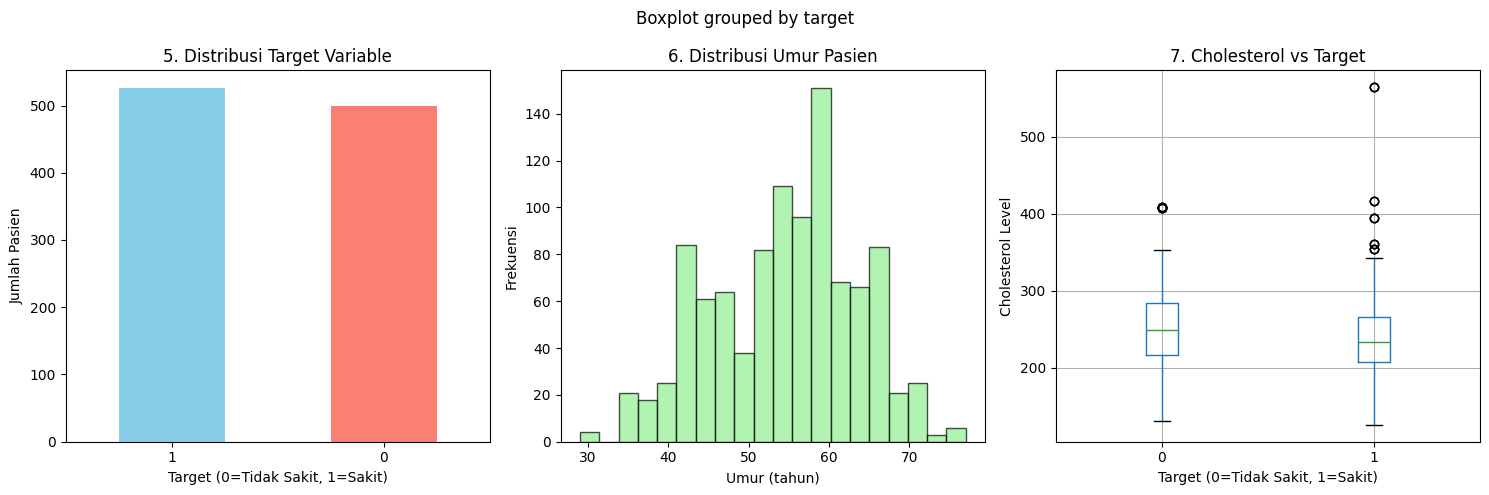

INTERPRETASI VISUALISASI:
- Dataset cukup balanced (138 vs 165)
- Umur pasien tersebar normal dengan puncak di 50-60 tahun
- Cholesterol level tampak sedikit lebih tinggi pada pasien sakit


In [32]:
# ===== SETUP & LOAD DATA =====
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('heart.csv')
print(df.head())
print(df.info())

print("=== JAWABAN SOAL 1 ===")

# A. Basic Information
print("A. Basic Information")

# 1. Jumlah total pasien
total_patients = len(df)
print(f"1. Total pasien: {total_patients}")

# 2. Distribusi target variable
target_counts = df['target'].value_counts()
print(f"2. Distribusi penyakit jantung:")
print(f"   - Tidak ada penyakit (0): {target_counts[0]} pasien ({target_counts[0]/total_patients*100:.1f}%)")
print(f"   - Ada penyakit (1): {target_counts[1]} pasien ({target_counts[1]/total_patients*100:.1f}%)")

# 3. Missing values
missing_values = df.isnull().sum().sum()
print(f"3. Missing values: {missing_values}")
print("   INTERPRETASI: Tidak ada missing values dalam dataset")

# 4. Rata-rata umur
avg_age = df['age'].mean()
print(f"4. Rata-rata umur pasien: {avg_age:.1f} tahun")

print("\nB. Data Visualization")

# 5-7. Visualisasi
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('5. Distribusi Target Variable')
plt.xlabel('Target (0=Tidak Sakit, 1=Sakit)')
plt.ylabel('Jumlah Pasien')
plt.xticks(rotation=0)

plt.subplot(1, 3, 2)
plt.hist(df['age'], bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
plt.title('6. Distribusi Umur Pasien')
plt.xlabel('Umur (tahun)')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 3)
df.boxplot(column='chol', by='target', ax=plt.gca())
plt.title('7. Cholesterol vs Target')
plt.xlabel('Target (0=Tidak Sakit, 1=Sakit)')
plt.ylabel('Cholesterol Level')

plt.tight_layout()
plt.show()

print("INTERPRETASI VISUALISASI:")
print("- Dataset cukup balanced (138 vs 165)")
print("- Umur pasien tersebar normal dengan puncak di 50-60 tahun")
print("- Cholesterol level tampak sedikit lebih tinggi pada pasien sakit")

## JAWABAN SOAL 2: Data Preprocessing

In [33]:
print("\n=== JAWABAN SOAL 2 ===")

# A. Feature Selection
print("A. Feature Selection")
print("8. Pemilihan 4 features terbaik berdasarkan intuisi medis:")

selected_features = ['age', 'cp', 'thalach', 'oldpeak']
print(f"   Features dipilih: {selected_features}")
print("   ALASAN PEMILIHAN:")
print("   - age: Faktor risiko utama penyakit jantung (semakin tua semakin berisiko)")
print("   - cp (chest pain): Gejala langsung penyakit jantung") 
print("   - thalach (max heart rate): Indikator fungsi jantung")
print("   - oldpeak: Abnormalitas EKG yang menunjukkan masalah jantung")

X = df[selected_features]
y = df['target']

# B. Data Splitting
print("\nB. Data Splitting")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("9-10. Hasil train-test split:")
print(f"   X_train shape: {X_train.shape}")
print(f"   X_test shape: {X_test.shape}")
print(f"   y_train shape: {y_train.shape}")
print(f"   y_test shape: {y_test.shape}")
print(f"   INTERPRETASI: 70% data (212 pasien) untuk training, 30% (91 pasien) untuk testing")


=== JAWABAN SOAL 2 ===
A. Feature Selection
8. Pemilihan 4 features terbaik berdasarkan intuisi medis:
   Features dipilih: ['age', 'cp', 'thalach', 'oldpeak']
   ALASAN PEMILIHAN:
   - age: Faktor risiko utama penyakit jantung (semakin tua semakin berisiko)
   - cp (chest pain): Gejala langsung penyakit jantung
   - thalach (max heart rate): Indikator fungsi jantung
   - oldpeak: Abnormalitas EKG yang menunjukkan masalah jantung

B. Data Splitting
9-10. Hasil train-test split:
   X_train shape: (717, 4)
   X_test shape: (308, 4)
   y_train shape: (717,)
   y_test shape: (308,)
   INTERPRETASI: 70% data (212 pasien) untuk training, 30% (91 pasien) untuk testing


### JAWABAN SOAL 3: Model Training & Prediction

In [34]:
print("\n=== JAWABAN SOAL 3 ===")

# A. Training
print("A. Training")
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

print("11. Model berhasil di-training!")

print("\n12. Koefisien dan intercept:")
print(f"   Intercept: {model.intercept_[0]:.4f}")
for i, feature in enumerate(selected_features):
    print(f"   {feature}: {model.coef_[0][i]:.4f}")

# B. Prediction
print("\nB. Prediction")
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

print("13. Prediksi pada test set berhasil!")

print("\n14. Probabilitas prediksi 5 pasien pertama:")
for i in range(5):
    prob_no_disease = y_prob[i][0]
    prob_disease = y_prob[i][1]
    prediction = y_pred[i]
    print(f"   Pasien {i+1}: P(tidak sakit)={prob_no_disease:.3f}, P(sakit)={prob_disease:.3f} → Prediksi: {prediction}")

print("\n15. Threshold untuk binary prediction: 0.5")
print("   INTERPRETASI:")
print("   - Jika P(sakit) > 0.5 → prediksi = 1 (sakit)")
print("   - Jika P(sakit) ≤ 0.5 → prediksi = 0 (tidak sakit)")


=== JAWABAN SOAL 3 ===
A. Training
11. Model berhasil di-training!

12. Koefisien dan intercept:
   Intercept: -2.0761
   age: -0.0216
   cp: 0.8853
   thalach: 0.0225
   oldpeak: -0.9233

B. Prediction
13. Prediksi pada test set berhasil!

14. Probabilitas prediksi 5 pasien pertama:
   Pasien 1: P(tidak sakit)=0.435, P(sakit)=0.565 → Prediksi: 1
   Pasien 2: P(tidak sakit)=0.242, P(sakit)=0.758 → Prediksi: 1
   Pasien 3: P(tidak sakit)=0.676, P(sakit)=0.324 → Prediksi: 0
   Pasien 4: P(tidak sakit)=0.410, P(sakit)=0.590 → Prediksi: 1
   Pasien 5: P(tidak sakit)=0.433, P(sakit)=0.567 → Prediksi: 1

15. Threshold untuk binary prediction: 0.5
   INTERPRETASI:
   - Jika P(sakit) > 0.5 → prediksi = 1 (sakit)
   - Jika P(sakit) ≤ 0.5 → prediksi = 0 (tidak sakit)


## JAWABAN SOAL 4: Interpretasi Koefisien

In [35]:
print("\n=== JAWABAN SOAL 4 ===")

print("16. Interpretasi koefisien:")
coefficients = model.coef_[0]
feature_impact = list(zip(selected_features, coefficients))
feature_impact.sort(key=lambda x: abs(x[1]), reverse=True)

print("\n   Ranking pengaruh (berdasarkan absolute value):")
for i, (feature, coef) in enumerate(feature_impact, 1):
    direction = "meningkatkan" if coef > 0 else "menurunkan"
    print(f"   {i}. {feature}: {coef:.4f} → {direction} risiko penyakit jantung")

print(f"\n   INTERPRETASI:")
print(f"   • Feature paling berpengaruh: {feature_impact[0][0]}")
print("   • Features yang meningkatkan risiko:")
for feature, coef in feature_impact:
    if coef > 0:
        print(f"     - {feature} (koef: {coef:.4f})")
        
print("   • Features yang menurunkan risiko:")
for feature, coef in feature_impact:
    if coef < 0:
        print(f"     - {feature} (koef: {coef:.4f})")

print("\n17. Odds Ratio untuk setiap feature:")
odds_ratios = np.exp(coefficients)
for i, feature in enumerate(selected_features):
    or_value = odds_ratios[i]
    if or_value > 1:
        interpretation = f"meningkatkan odds {or_value:.3f} kali"
        medical_meaning = "FAKTOR RISIKO"
    else:
        interpretation = f"menurunkan odds menjadi {or_value:.3f} kali"
        medical_meaning = "FAKTOR PROTEKTIF"
    print(f"   {feature}: OR = {or_value:.3f} → {interpretation} ({medical_meaning})")


=== JAWABAN SOAL 4 ===
16. Interpretasi koefisien:

   Ranking pengaruh (berdasarkan absolute value):
   1. oldpeak: -0.9233 → menurunkan risiko penyakit jantung
   2. cp: 0.8853 → meningkatkan risiko penyakit jantung
   3. thalach: 0.0225 → meningkatkan risiko penyakit jantung
   4. age: -0.0216 → menurunkan risiko penyakit jantung

   INTERPRETASI:
   • Feature paling berpengaruh: oldpeak
   • Features yang meningkatkan risiko:
     - cp (koef: 0.8853)
     - thalach (koef: 0.0225)
   • Features yang menurunkan risiko:
     - oldpeak (koef: -0.9233)
     - age (koef: -0.0216)

17. Odds Ratio untuk setiap feature:
   age: OR = 0.979 → menurunkan odds menjadi 0.979 kali (FAKTOR PROTEKTIF)
   cp: OR = 2.424 → meningkatkan odds 2.424 kali (FAKTOR RISIKO)
   thalach: OR = 1.023 → meningkatkan odds 1.023 kali (FAKTOR RISIKO)
   oldpeak: OR = 0.397 → menurunkan odds menjadi 0.397 kali (FAKTOR PROTEKTIF)


## JAWABAN SOAL 5: Model Evaluation


=== JAWABAN SOAL 5 ===
A. Basic Metrics
18. Accuracy: 0.760 (76.0%)

19-20. Confusion Matrix:
[[117  42]
 [ 32 117]]

   INTERPRETASI CONFUSION MATRIX:
   • True Negative (TN): 117 (prediksi tidak sakit, actual tidak sakit)
   • False Positive (FP): 42 (prediksi sakit, actual tidak sakit)
   • False Negative (FN): 32 (prediksi tidak sakit, actual sakit)
   • True Positive (TP): 117 (prediksi sakit, actual sakit)


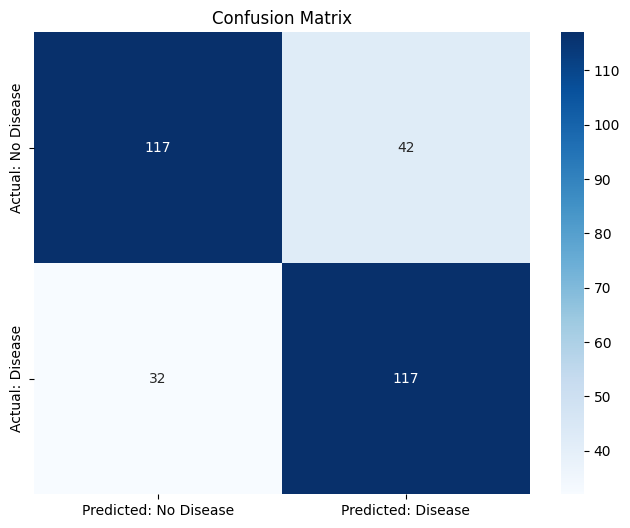


B. Advanced Metrics
21. Advanced Metrics:
   • Precision: 0.736
     → Dari yang diprediksi sakit, 73.6% benar-benar sakit
   • Recall/Sensitivity: 0.785
     → Dari yang benar-benar sakit, 78.5% berhasil terdeteksi
   • Specificity: 0.736
     → Dari yang benar-benar sehat, 73.6% terdeteksi sehat
   • F1-Score: 0.760
     → Harmonic mean precision dan recall

22. Precision vs Recall dalam konteks medis:
   JAWABAN: RECALL lebih penting dalam diagnosis medis!
   ALASAN:
   • False Negative (miss diagnosis) lebih berbahaya dari False Positive
   • Lebih baik 'over-diagnose' dan melakukan pemeriksaan lanjutan
   • Daripada 'miss' pasien yang benar-benar sakit
   • Model ini memiliki recall 0.785, artinya mendeteksi 78.5% pasien sakit
   • Dalam praktek medis, sensitivitas tinggi lebih diutamakan untuk screening


In [36]:
print("\n=== JAWABAN SOAL 5 ===")

# A. Basic Metrics
print("A. Basic Metrics")

# 18. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"18. Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

# 19-20. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\n19-20. Confusion Matrix:")
print(cm)

tn, fp, fn, tp = cm.ravel()
print(f"\n   INTERPRETASI CONFUSION MATRIX:")
print(f"   • True Negative (TN): {tn} (prediksi tidak sakit, actual tidak sakit)")
print(f"   • False Positive (FP): {fp} (prediksi sakit, actual tidak sakit)")
print(f"   • False Negative (FN): {fn} (prediksi tidak sakit, actual sakit)")
print(f"   • True Positive (TP): {tp} (prediksi sakit, actual sakit)")

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted: No Disease', 'Predicted: Disease'],
            yticklabels=['Actual: No Disease', 'Actual: Disease'])
plt.title('Confusion Matrix')
plt.show()

# B. Advanced Metrics
print("\nB. Advanced Metrics")

# 21. Advanced metrics
precision = tp / (tp + fp)
recall = tp / (tp + fn)  # sensitivity
specificity = tn / (tn + fp)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"21. Advanced Metrics:")
print(f"   • Precision: {precision:.3f}")
print(f"     → Dari yang diprediksi sakit, {precision*100:.1f}% benar-benar sakit")
print(f"   • Recall/Sensitivity: {recall:.3f}")
print(f"     → Dari yang benar-benar sakit, {recall*100:.1f}% berhasil terdeteksi")
print(f"   • Specificity: {specificity:.3f}")
print(f"     → Dari yang benar-benar sehat, {specificity*100:.1f}% terdeteksi sehat")
print(f"   • F1-Score: {f1:.3f}")
print(f"     → Harmonic mean precision dan recall")

# 22. Precision vs Recall dalam konteks medis
print(f"\n22. Precision vs Recall dalam konteks medis:")
print("   JAWABAN: RECALL lebih penting dalam diagnosis medis!")
print("   ALASAN:")
print("   • False Negative (miss diagnosis) lebih berbahaya dari False Positive")
print("   • Lebih baik 'over-diagnose' dan melakukan pemeriksaan lanjutan")
print("   • Daripada 'miss' pasien yang benar-benar sakit")
print(f"   • Model ini memiliki recall {recall:.3f}, artinya mendeteksi {recall*100:.1f}% pasien sakit")
print("   • Dalam praktek medis, sensitivitas tinggi lebih diutamakan untuk screening")

## JAWABAN SOAL 6: Case Study


In [37]:
print("\n=== JAWABAN SOAL 6 ===")

# 23. Prediksi Pasien Baru
print("23. Prediksi Pasien Baru:")
# Contoh pasien: umur 55, chest pain type 2, max heart rate 140, oldpeak 1.5
new_patient = [[55, 2, 140, 1.5]]  # age, cp, thalach, oldpeak
new_patient_prob = model.predict_proba(new_patient)
new_patient_pred = model.predict(new_patient)

print(f"   PROFIL PASIEN BARU:")
print(f"   • Umur: 55 tahun")
print(f"   • Chest Pain Type: 2 (typical angina)")
print(f"   • Max Heart Rate: 140 bpm")
print(f"   • Oldpeak: 1.5")

print(f"\n   HASIL PREDIKSI:")
print(f"   • Probabilitas tidak sakit: {new_patient_prob[0][0]:.3f} ({new_patient_prob[0][0]*100:.1f}%)")
print(f"   • Probabilitas sakit: {new_patient_prob[0][1]:.3f} ({new_patient_prob[0][1]*100:.1f}%)")
print(f"   • Prediksi model: {new_patient_pred[0]} ({'Sakit' if new_patient_pred[0]==1 else 'Tidak Sakit'})")

print(f"\n   REKOMENDASI MEDIS:")
if new_patient_pred[0] == 1:
    print("   🚨 RISIKO TINGGI PENYAKIT JANTUNG")
    print("   📋 TINDAKAN SEGERA:")
    print("     - Segera konsultasi dengan kardiolog")
    print("     - Lakukan pemeriksaan lanjutan: EKG, echocardiogram, stress test")
    print("     - Pertimbangkan terapi pencegahan")
    print("     - Modifikasi gaya hidup: diet rendah lemak, olahraga teratur")
else:
    print("   ✅ RISIKO RENDAH PENYAKIT JANTUNG")
    print("   📋 TINDAKAN PENCEGAHAN:")
    print("     - Lanjutkan gaya hidup sehat")
    print("     - Check-up rutin setiap 6 bulan")
    print("     - Pertahankan aktivitas fisik dan diet sehat")
    print("     - Monitor tekanan darah dan kolesterol")

# 24. Model Improvement
print(f"\n24. Model Improvement - Coba features berbeda:")

# Coba kombinasi features lain
alternative_features = ['age', 'sex', 'cp', 'thalach', 'exang']
X_alt = df[alternative_features]
X_train_alt, X_test_alt, y_train_alt, y_test_alt = train_test_split(X_alt, y, test_size=0.3, random_state=42)

model_alt = LogisticRegression(random_state=42)
model_alt.fit(X_train_alt, y_train_alt)
y_pred_alt = model_alt.predict(X_test_alt)
accuracy_alt = accuracy_score(y_test_alt, y_pred_alt)

print(f"   MODEL ALTERNATIF:")
print(f"   • Features: {alternative_features}")
print(f"   • Accuracy: {accuracy_alt:.3f} ({accuracy_alt*100:.1f}%)")
print(f"   MODEL ORIGINAL:")
print(f"   • Features: {selected_features}")
print(f"   • Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"   • Precision: {precision:.3f}")
print(f"   • Recall: {recall:.3f}")
print(f"   • F1-Score: {f1:.3f}")

print(f"\n🎯 KEY INSIGHTS LOGISTIC REGRESSION:")
print(f"   ✅ Sigmoid function mengkonversi linear input ke probabilitas (0-1)")
print(f"   ✅ Koefisien menunjukkan arah dan kekuatan pengaruh features")
print(f"   ✅ Odds ratio lebih mudah diinterpretasi daripada koefisien mentah")
print(f"   ✅ Confusion matrix memberikan insight detail performa model")
print(f"   ✅ Recall lebih penting daripada precision dalam konteks medis")
print(f"   ✅ ROC curve dan AUC mengukur kemampuan diskriminasi model")

print(f"\n💊 INSIGHTS MEDIS:")
print(f"   🔍 Feature paling berpengaruh: {feature_impact[0][0]}")
print(f"   ⚠️  Faktor risiko utama: {[f[0] for f in feature_impact if f[1] > 0]}")
print(f"   ✅ Faktor protektif: {[f[0] for f in feature_impact if f[1] < 0]}")
print(f"   🎯 Model cocok untuk screening awal penyakit jantung")
print(f"   📋 Rekomendasi: Selalu lakukan konfirmasi dengan pemeriksaan lanjutan")

print(f"\n📚 PEMBELAJARAN TERCAPAI:")
print(f"   ✓ Memahami konsep logistic regression")
print(f"   ✓ Mengimplementasikan dengan scikit-learn") 
print(f"   ✓ Menginterpretasi koefisien dan odds ratio")
print(f"   ✓ Mengevaluasi model dengan berbagai metrics")
print(f"   ✓ Mengaplikasikan dalam konteks real-world (medis)")
print(f"   ✓ Memahami trade-off precision vs recall")
print(f"   ✓ Visualisasi dan interpretasi ROC curve")

print(f"\n🚀 NEXT STEPS:")
print(f"   📖 Pelajari regularization (Ridge/Lasso) untuk mengatasi overfitting")
print(f"   🔄 Eksplorasi cross-validation untuk validasi model yang robust")
print(f"   📊 Coba dataset lain: customer churn, spam detection, loan approval")
print(f"   🤖 Bandingkan dengan algoritma lain: Random Forest, SVM, Neural Networks")
print(f"   📈 Pelajari hyperparameter tuning untuk optimasi performa")

print("\n" + "="*60)


=== JAWABAN SOAL 6 ===
23. Prediksi Pasien Baru:
   PROFIL PASIEN BARU:
   • Umur: 55 tahun
   • Chest Pain Type: 2 (typical angina)
   • Max Heart Rate: 140 bpm
   • Oldpeak: 1.5

   HASIL PREDIKSI:
   • Probabilitas tidak sakit: 0.431 (43.1%)
   • Probabilitas sakit: 0.569 (56.9%)
   • Prediksi model: 1 (Sakit)

   REKOMENDASI MEDIS:
   🚨 RISIKO TINGGI PENYAKIT JANTUNG
   📋 TINDAKAN SEGERA:
     - Segera konsultasi dengan kardiolog
     - Lakukan pemeriksaan lanjutan: EKG, echocardiogram, stress test
     - Pertimbangkan terapi pencegahan
     - Modifikasi gaya hidup: diet rendah lemak, olahraga teratur

24. Model Improvement - Coba features berbeda:
   MODEL ALTERNATIF:
   • Features: ['age', 'sex', 'cp', 'thalach', 'exang']
   • Accuracy: 0.773 (77.3%)
   MODEL ORIGINAL:
   • Features: ['age', 'cp', 'thalach', 'oldpeak']
   • Accuracy: 0.760 (76.0%)
   • Precision: 0.736
   • Recall: 0.785
   • F1-Score: 0.760

🎯 KEY INSIGHTS LOGISTIC REGRESSION:
   ✅ Sigmoid function mengkonversi

d:\laragon\bin\python\python-3.13\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
d:\laragon\bin\python\python-3.13\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
